In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Re-create the "sales_data.csv" by including more metrics related to buying behaviors

raw_data = pd.read_csv('ifood.csv')

sales_columns = [
    'MntWines', 'MntFruits', 'MntMeatProducts', 
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
    'MntTotal', 'MntRegularProds', 'NumDealsPurchases', 
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
    'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
    'AcceptedCmpOverall'
]

sales_data = raw_data[sales_columns]

output_file_path = '/Users/mac/F24_DATA110/Project/F1/sales_data.csv'
sales_data.to_csv(output_file_path, index=False)

output_file_path

'/Users/mac/F24_DATA110/Project/F1/sales_data.csv'

In [4]:
sales_data = pd.read_csv('sales_data.csv')
sales_data

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntTotal,MntRegularProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,AcceptedCmpOverall
0,635,88,546,172,88,88,1529,1441,3,8,10,4,7,0,0,0,0,0,0
1,11,1,6,2,1,6,21,15,2,1,1,2,5,0,0,0,0,0,0
2,426,49,127,111,21,42,734,692,1,8,2,10,4,0,0,0,0,0,0
3,11,4,20,10,3,5,48,43,2,2,0,4,6,0,0,0,0,0,0
4,173,43,118,46,27,15,407,392,5,5,3,6,5,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,709,43,182,42,118,247,1094,847,2,9,3,4,5,0,0,0,0,0,0
2201,406,0,30,0,0,8,436,428,7,8,2,5,7,0,0,0,1,0,1
2202,908,48,217,32,12,24,1217,1193,1,2,3,13,6,0,1,0,0,0,1
2203,428,30,214,80,30,61,782,721,2,6,5,10,3,0,0,0,0,0,0


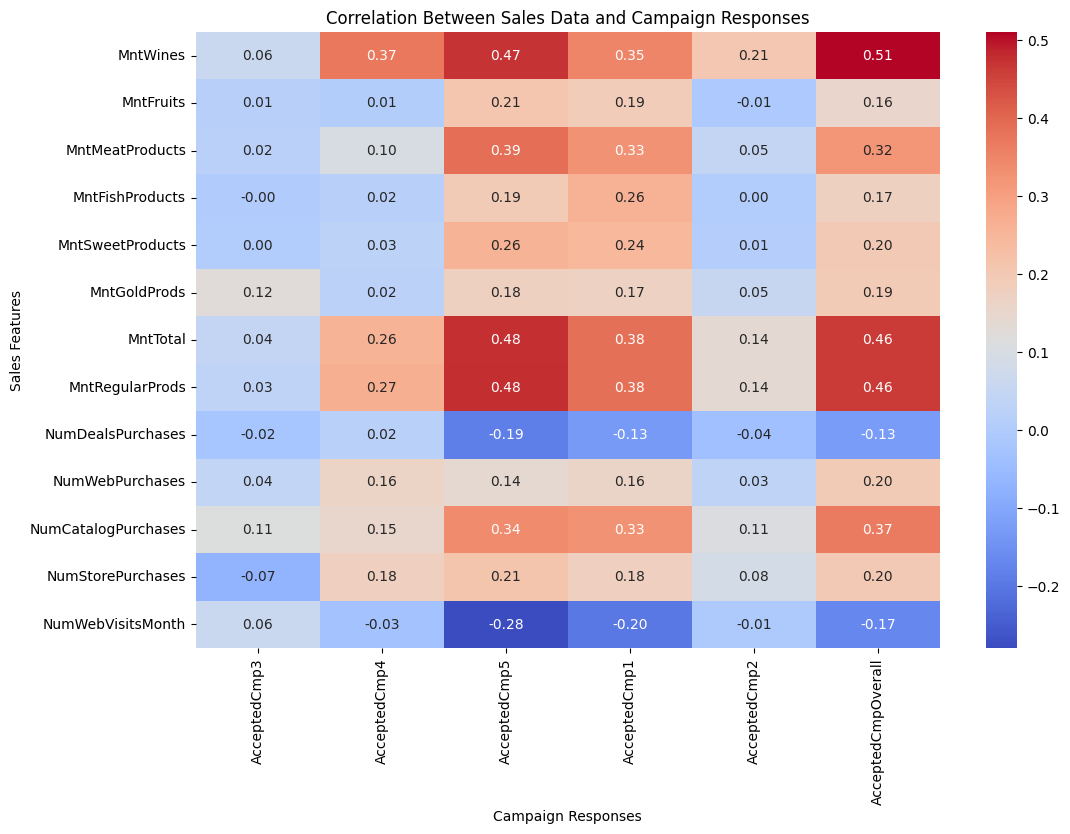

In [5]:
sales_data = pd.read_csv('sales_data.csv')

sales_columns = [
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'MntTotal', 'MntRegularProds',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
    'NumStorePurchases', 'NumWebVisitsMonth'
]
campaign_columns = [
    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 
    'AcceptedCmpOverall'
]

correlation_matrix = sales_data[sales_columns + campaign_columns].corr()
correlation_with_campaigns = correlation_matrix.loc[sales_columns, campaign_columns]

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_with_campaigns, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Between Sales Data and Campaign Responses')
plt.xlabel('Campaign Responses')
plt.ylabel('Sales Features')
plt.show()